In [17]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import random

In [18]:
# one_hot=True => Y값을 one_hot으로 읽어오게 함
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [19]:
nb_classes = 10

# MNIST Dataset: 28 * 28 = 784 pixels of image
X = tf.placeholder(tf.float32, [None, 784])
# 0-9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [20]:
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [21]:
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [22]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [23]:
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [24]:
# 전체 데이터셋을 한 번 다 학습시키는 것 == 1 epoch
# ex. 1000개의 training set & batch_size=500: 1 epoch를 완료하기 위해서는 2번의 iteration이 필요함
training_epochs = 15

# 한 번에 몇 개씩 학습시킬 것인지
batch_size = 100

Epoch: 0001 cost = 2.796978281
Epoch: 0002 cost = 1.104763022
Epoch: 0003 cost = 0.875814939
Epoch: 0004 cost = 0.761805980
Epoch: 0005 cost = 0.690176841
Epoch: 0006 cost = 0.639658604
Epoch: 0007 cost = 0.601253867
Epoch: 0008 cost = 0.571562964
Epoch: 0009 cost = 0.547332351
Epoch: 0010 cost = 0.526440930
Epoch: 0011 cost = 0.509300216
Epoch: 0012 cost = 0.494358789
Epoch: 0013 cost = 0.481046034
Epoch: 0014 cost = 0.469919280
Epoch: 0015 cost = 0.458898193
Accuracy:  0.8872
Label: [0]
Prediction: [0]


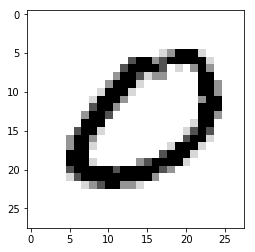

In [25]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            # 100개씩 잘라서 학습
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()